In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statannot import add_stat_annotation
%matplotlib inline

In [2]:
metadata = pd.read_table("../data/Microbiome/circadianIHC_metadata_cleaned.txt", sep='\t', index_col=0)
metadata.head()

,anonymized_name,cage_food_consumption_g,cage_location,cage_notes,cage_number,timepoint,zt,cycle,collection_timestamp,description,...,physical_specimen_location,physical_specimen_remaining,qiita_study_id,sample_name_orit,sample_type,scientific_name,sex,taxon_id,title,treatment
sample_name,,,,,,,,,,,,,,,,,,,,,
11548.132.133.1a,A32.133.1,not applicable,not applicable,not applicable,A32,1,2,day,12/14/17 8:00,4-8 am collection mouse 133,...,LBR freezer,True,11548,not applicable,feces,mouse gut metagenome,male,410661,IHC CR,On shelf
11548.132.133.2a,A32.133.2,not applicable,not applicable,not applicable,A32,2,6,day,12/14/17 12:00,8 am-12 pm collection mouse 133,...,LBR freezer,True,11548,not applicable,feces,mouse gut metagenome,male,410661,IHC CR,On shelf
11548.132.133.3a,A32.133.3,not applicable,not applicable,not applicable,A32,3,10,day,12/14/17 16:00,12 pm-4 pm collection mouse 133,...,LBR freezer,True,11548,not applicable,feces,mouse gut metagenome,male,410661,IHC CR,On shelf
11548.132.133.4a,A32.133.4,not applicable,not applicable,not applicable,A32,4,14,night,12/14/17 20:00,4 pm-8 pm collection mouse 133,...,LBR freezer,True,11548,not applicable,feces,mouse gut metagenome,male,410661,IHC CR,On shelf
11548.132.133.5a,A32.133.5,not applicable,not applicable,not applicable,A32,5,18,night,12/15/17 0:00,8 pm-12 am collection mouse 133,...,LBR freezer,True,11548,not applicable,feces,mouse gut metagenome,male,410661,IHC CR,On shelf


In [3]:
from scipy.stats import mannwhitneyu

# Phylum Level

In [4]:
phyla = pd.read_table("../data/Microbiome/core_diversity_12000/rarefied_phyla_relfreq_table.txt", sep='\t', index_col=0)
phyla_sp = phyla.T
phyla_sp.head()

#OTU ID,k__Archaea;p__Crenarchaeota,k__Bacteria;__,k__Bacteria;p__Actinobacteria,k__Bacteria;p__Bacteroidetes,k__Bacteria;p__Chloroflexi,k__Bacteria;p__Cyanobacteria,k__Bacteria;p__Firmicutes,k__Bacteria;p__Proteobacteria,k__Bacteria;p__Tenericutes,k__Bacteria;p__Verrucomicrobia,k__Bacteria;p__[Thermi]
11548.A25.126.5a,0.000000,0.020250,0.000500,0.236000,0.0,0.0,0.256583,0.000000,0.000583,0.486083,0.0
11548.132.133.5a,0.000667,0.012833,0.002500,0.130750,0.0,0.0,0.238750,0.000417,0.000417,0.613667,0.0
11548.A31.132.3a,0.000000,0.010167,0.001667,0.343750,0.0,0.0,0.244333,0.000000,0.000000,0.400083,0.0
11548.A29.130.5a,0.000000,0.012833,0.004333,0.227667,0.0,0.0,0.217000,0.000000,0.002167,0.536000,0.0
11548.A26.127.1a,0.000000,0.010667,0.001250,0.203083,0.0,0.0,0.430250,0.000000,0.000000,0.354750,0.0


In [5]:
phyla_merged = pd.merge(phyla_sp, metadata, left_index=True, right_index=True)
phyla_merged.head()

,k__Archaea;p__Crenarchaeota,k__Bacteria;__,k__Bacteria;p__Actinobacteria,k__Bacteria;p__Bacteroidetes,k__Bacteria;p__Chloroflexi,k__Bacteria;p__Cyanobacteria,k__Bacteria;p__Firmicutes,k__Bacteria;p__Proteobacteria,k__Bacteria;p__Tenericutes,k__Bacteria;p__Verrucomicrobia,...,physical_specimen_location,physical_specimen_remaining,qiita_study_id,sample_name_orit,sample_type,scientific_name,sex,taxon_id,title,treatment
11548.A25.126.5a,0.000000,0.020250,0.000500,0.236000,0.0,0.0,0.256583,0.000000,0.000583,0.486083,...,UCSDMI,True,11548,not applicable,feces,mouse gut metagenome,male,410661,IHC CR,In chamber
11548.132.133.5a,0.000667,0.012833,0.002500,0.130750,0.0,0.0,0.238750,0.000417,0.000417,0.613667,...,LBR freezer,True,11548,not applicable,feces,mouse gut metagenome,male,410661,IHC CR,On shelf
11548.A31.132.3a,0.000000,0.010167,0.001667,0.343750,0.0,0.0,0.244333,0.000000,0.000000,0.400083,...,UCSDMI,True,11548,not applicable,feces,mouse gut metagenome,male,410661,IHC CR,On shelf
11548.A29.130.5a,0.000000,0.012833,0.004333,0.227667,0.0,0.0,0.217000,0.000000,0.002167,0.536000,...,UCSDMI,True,11548,not applicable,feces,mouse gut metagenome,male,410661,IHC CR,On shelf
11548.A26.127.1a,0.000000,0.010667,0.001250,0.203083,0.0,0.0,0.430250,0.000000,0.000000,0.354750,...,UCSDMI,True,11548,not applicable,feces,mouse gut metagenome,male,410661,IHC CR,In chamber


In [6]:
phyla_merged["both"] = phyla_merged["exposure_type"].astype(str) + "_" + phyla_merged["timepoint"].astype(str)

In [7]:
fn = lambda row: row.timepoint + 6 # define a function for the new column
col = phyla_merged.apply(fn, axis=1) # get column data with an index
phyla_merged = phyla_merged.assign(new_tp=col.values) # assign values to column 'new'
phyla_merged.head()

,k__Archaea;p__Crenarchaeota,k__Bacteria;__,k__Bacteria;p__Actinobacteria,k__Bacteria;p__Bacteroidetes,k__Bacteria;p__Chloroflexi,k__Bacteria;p__Cyanobacteria,k__Bacteria;p__Firmicutes,k__Bacteria;p__Proteobacteria,k__Bacteria;p__Tenericutes,k__Bacteria;p__Verrucomicrobia,...,qiita_study_id,sample_name_orit,sample_type,scientific_name,sex,taxon_id,title,treatment,both,new_tp
11548.A25.126.5a,0.000000,0.020250,0.000500,0.236000,0.0,0.0,0.256583,0.000000,0.000583,0.486083,...,11548,not applicable,feces,mouse gut metagenome,male,410661,IHC CR,In chamber,IHC_5,11
11548.132.133.5a,0.000667,0.012833,0.002500,0.130750,0.0,0.0,0.238750,0.000417,0.000417,0.613667,...,11548,not applicable,feces,mouse gut metagenome,male,410661,IHC CR,On shelf,Air_5,11
11548.A31.132.3a,0.000000,0.010167,0.001667,0.343750,0.0,0.0,0.244333,0.000000,0.000000,0.400083,...,11548,not applicable,feces,mouse gut metagenome,male,410661,IHC CR,On shelf,Air_3,9
11548.A29.130.5a,0.000000,0.012833,0.004333,0.227667,0.0,0.0,0.217000,0.000000,0.002167,0.536000,...,11548,not applicable,feces,mouse gut metagenome,male,410661,IHC CR,On shelf,Air_5,11
11548.A26.127.1a,0.000000,0.010667,0.001250,0.203083,0.0,0.0,0.430250,0.000000,0.000000,0.354750,...,11548,not applicable,feces,mouse gut metagenome,male,410661,IHC CR,In chamber,IHC_1,7


In [8]:
phyla_merged["new_both"] = phyla_merged["exposure_type"].astype(str) + "_" + phyla_merged["new_tp"].astype(str)

In [9]:
#phyla_merged.to_csv("../data/Microbiome/core_diversity_12000/rarefied_phyla_rf_double.txt", sep='\t')

In [10]:
#manually copied data and named condition_timepoint(7-12)

In [11]:
phyla_dp = pd.read_csv("../data/Microbiome/core_diversity_12000/rarefied_phyla_rf_double.txt", sep='\t', index_col=0)
phyla_dp.head()

,k__Archaea;p__Crenarchaeota,k__Bacteria;__,k__Bacteria;p__Actinobacteria,k__Bacteria;p__Bacteroidetes,k__Bacteria;p__Chloroflexi,k__Bacteria;p__Cyanobacteria,k__Bacteria;p__Firmicutes,k__Bacteria;p__Proteobacteria,k__Bacteria;p__Tenericutes,k__Bacteria;p__Verrucomicrobia,...,physical_specimen_remaining,qiita_study_id,sample_name_orit,sample_type,scientific_name,sex,taxon_id,title,treatment,both
11548.A25.126.5a,0.000000,0.020250,0.000500,0.236000,0.0,0.0,0.256583,0.000000,0.000583,0.486083,...,True,11548,not applicable,feces,mouse gut metagenome,male,410661,IHC CR,In chamber,IHC_5
11548.132.133.5a,0.000667,0.012833,0.002500,0.130750,0.0,0.0,0.238750,0.000417,0.000417,0.613667,...,True,11548,not applicable,feces,mouse gut metagenome,male,410661,IHC CR,On shelf,Air_5
11548.A31.132.3a,0.000000,0.010167,0.001667,0.343750,0.0,0.0,0.244333,0.000000,0.000000,0.400083,...,True,11548,not applicable,feces,mouse gut metagenome,male,410661,IHC CR,On shelf,Air_3
11548.A29.130.5a,0.000000,0.012833,0.004333,0.227667,0.0,0.0,0.217000,0.000000,0.002167,0.536000,...,True,11548,not applicable,feces,mouse gut metagenome,male,410661,IHC CR,On shelf,Air_5
11548.A26.127.1a,0.000000,0.010667,0.001250,0.203083,0.0,0.0,0.430250,0.000000,0.000000,0.354750,...,True,11548,not applicable,feces,mouse gut metagenome,male,410661,IHC CR,In chamber,IHC_1


In [12]:
phyla_top_3 = ['k__Bacteria;p__Firmicutes', 'k__Bacteria;p__Bacteroidetes', 'k__Bacteria;p__Verrucomicrobia']

In [13]:
import matplotlib.patches as patches

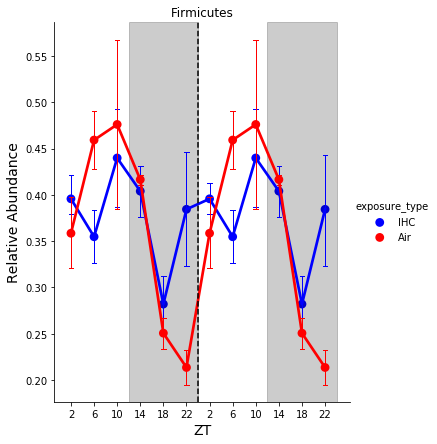

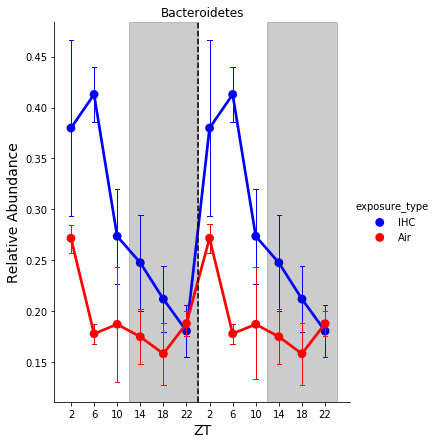

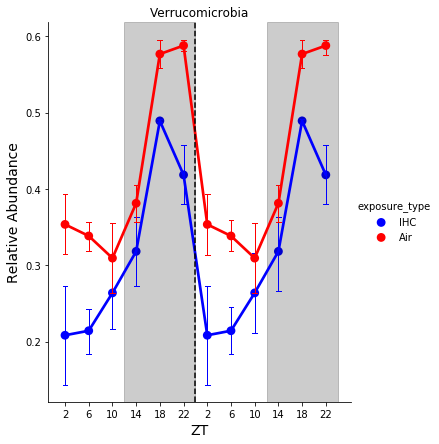

In [14]:
for phyla in phyla_top_3:
    g = sns.catplot(x="timepoint", y=phyla,
                hue="exposure_type", capsize=.2, palette=['blue', 'red'], ci=68,
                height=6, aspect=.85, kind="point", errwidth=1, data=phyla_dp)

    plt.axvspan(2.5, 5.5, alpha=0.2, color='black')
    plt.axvspan(8.5, 11.5, alpha=0.2, color='black')
    plt.axvline(x=5.5, color='k', linestyle='--')
    plt.title(phyla.split("_")[-1])
    plt.ylabel('Relative Abundance', fontsize=14)
    plt.xlabel('ZT', fontsize=14)
    plt.xticks(np.arange(12), ('2', '6', '10', '14', '18', '22', '2', '6', '10', '14', '18', '22'))
    plt.savefig('../figures/cIHC_phlya_double_%s.svg' % phyla.split("_")[-1], dpi=300, bbox_inches = "tight")
    plt.show()

In [15]:
phyla_dp_all = phyla_dp[['k__Bacteria;p__Firmicutes', 'k__Bacteria;p__Bacteroidetes', 
                        'k__Bacteria;p__Verrucomicrobia', 'exposure_type', 'timepoint']].copy()
phyla_dp_all

,k__Bacteria;p__Firmicutes,k__Bacteria;p__Bacteroidetes,k__Bacteria;p__Verrucomicrobia,exposure_type,timepoint
11548.A25.126.5a,0.256583,0.236000,0.486083,IHC,5
11548.132.133.5a,0.238750,0.130750,0.613667,Air,5
11548.A31.132.3a,0.244333,0.343750,0.400083,Air,3
11548.A29.130.5a,0.217000,0.227667,0.536000,Air,5
11548.A26.127.1a,0.430250,0.203083,0.354750,IHC,1
...,...,...,...,...,...
11548.A31.132.1a,0.391083,0.254250,0.341083,Air,7
11548.A27.128.3a,0.388250,0.317333,0.273167,IHC,9
11548.A24.125.5a,0.241917,0.259083,0.489833,IHC,11
11548.A30.131.3a,0.414667,0.177750,0.391250,Air,9


In [16]:
phyla_dp_all2 = pd.melt(phyla_dp_all, id_vars=['exposure_type', 'timepoint'], value_vars=['k__Bacteria;p__Firmicutes', 'k__Bacteria;p__Bacteroidetes', 
                        'k__Bacteria;p__Verrucomicrobia'], var_name='phyla', value_name='rel_freq')
phyla_dp_all2

,exposure_type,timepoint,phyla,rel_freq
0,IHC,5,k__Bacteria;p__Firmicutes,0.256583
1,Air,5,k__Bacteria;p__Firmicutes,0.238750
2,Air,3,k__Bacteria;p__Firmicutes,0.244333
3,Air,5,k__Bacteria;p__Firmicutes,0.217000
4,IHC,1,k__Bacteria;p__Firmicutes,0.430250
...,...,...,...,...
271,Air,7,k__Bacteria;p__Verrucomicrobia,0.341083
272,IHC,9,k__Bacteria;p__Verrucomicrobia,0.273167
273,IHC,11,k__Bacteria;p__Verrucomicrobia,0.489833
274,Air,9,k__Bacteria;p__Verrucomicrobia,0.391250


In [17]:
phyla_dp_IHC = phyla_dp_all2[phyla_dp_all2['exposure_type'] == "IHC"]
phyla_dp_Air = phyla_dp_all2[phyla_dp_all2['exposure_type'] == "Air"]

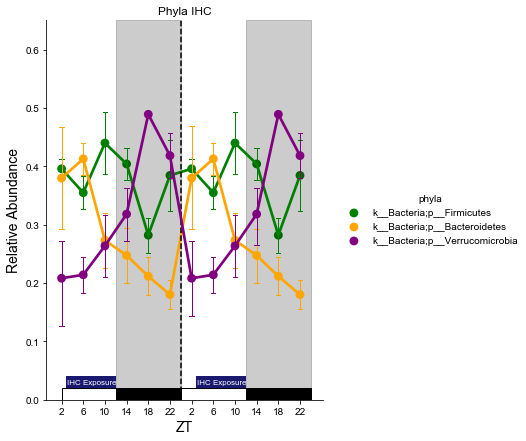

In [18]:
g = sns.catplot(x="timepoint", y='rel_freq',
                hue="phyla", capsize=.2, palette=['green', 'orange', 'purple'], ci=68,
                height=6, aspect=.85, kind="point", errwidth=1, data=phyla_dp_IHC)

exp = patches.Rectangle((0.2,0.01), 2.3, 0.03,linewidth=1,edgecolor='none',facecolor='midnightblue')
g.axes[0,0].add_patch(exp)
day = patches.Rectangle((0,0), 3, 0.02,linewidth=1,edgecolor='k',facecolor='w')
g.axes[0,0].add_patch(day)
night = patches.Rectangle((2.5,0), 3, 0.02,linewidth=1,edgecolor='k',facecolor='k')
g.axes[0,0].add_patch(night)

exp2 = patches.Rectangle((6.2,0.01), 2.3, 0.03,linewidth=1,edgecolor='none',facecolor='midnightblue')
g.axes[0,0].add_patch(exp2)
day2 = patches.Rectangle((5.5,0), 3, 0.02,linewidth=1,edgecolor='k',facecolor='w')
g.axes[0,0].add_patch(day2)
night2 = patches.Rectangle((8.5,0), 3, 0.02,linewidth=1,edgecolor='k',facecolor='k')
g.axes[0,0].add_patch(night2)

g.axes[0,0].text(1.4, 0.027, "IHC Exposure", ha='center', size=8, color='w')
g.axes[0,0].text(7.4, 0.027, "IHC Exposure", ha='center', size=8, color='w')
plt.ylim(0, 0.65)
plt.axvspan(2.5, 5.5, alpha=0.2, color='black')
plt.axvspan(8.5, 11.5, alpha=0.2, color='black')
plt.axvline(x=5.5, color='k', linestyle='--')
plt.title("Phyla IHC")
plt.ylabel('Relative Abundance', fontsize=14)
plt.xlabel('ZT', fontsize=14)
plt.xticks(np.arange(12), ('2', '6', '10', '14', '18', '22', '2', '6', '10', '14', '18', '22'))
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/cIHC_phlya_IHC.svg', dpi=300, bbox_inches="tight")

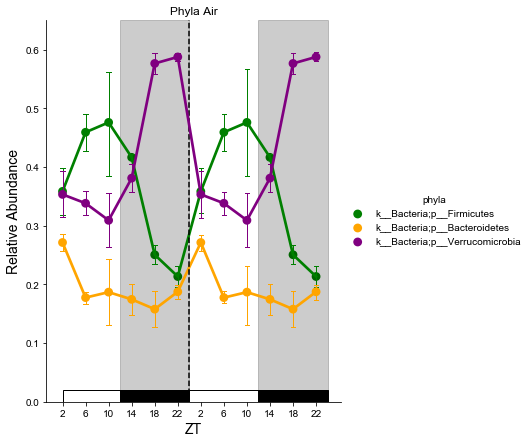

In [19]:
g = sns.catplot(x="timepoint", y='rel_freq',
                hue="phyla", capsize=.2, palette=['green', 'orange', 'purple'], ci=68,
                height=6, aspect=.85, kind="point", errwidth=1, data=phyla_dp_Air)

day = patches.Rectangle((0,0), 3, 0.02,linewidth=1,edgecolor='k',facecolor='w')
g.axes[0,0].add_patch(day)
night = patches.Rectangle((2.5,0), 3, 0.02,linewidth=1,edgecolor='k',facecolor='k')
g.axes[0,0].add_patch(night)

day2 = patches.Rectangle((5.5,0), 3, 0.02,linewidth=1,edgecolor='k',facecolor='w')
g.axes[0,0].add_patch(day2)
night2 = patches.Rectangle((8.5,0), 3, 0.02,linewidth=1,edgecolor='k',facecolor='k')
g.axes[0,0].add_patch(night2)

g.axes[0,0].text(1.4, 0.027, "IHC Exposure", ha='center', size=8, color='w')
g.axes[0,0].text(7.4, 0.027, "IHC Exposure", ha='center', size=8, color='w')
plt.ylim(0, 0.65)
plt.axvspan(2.5, 5.5, alpha=0.2, color='black')
plt.axvspan(8.5, 11.5, alpha=0.2, color='black')
plt.axvline(x=5.5, color='k', linestyle='--')
plt.title("Phyla Air")
plt.ylabel('Relative Abundance', fontsize=14)
plt.xlabel('ZT', fontsize=14)
plt.xticks(np.arange(12), ('2', '6', '10', '14', '18', '22', '2', '6', '10', '14', '18', '22'))
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/cIHC_phlya_Air.svg', dpi=300, bbox_inches="tight")

In [20]:
phyla_merged.sort_values('exposure_type', ascending=True, inplace=True)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

night_Air v.s. night_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=5.254e-02 U_stat=3.400e+01
day_Air v.s. day_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=3.401e-01 U_stat=8.200e+01
day_Air v.s. night_Air: Mann-Whitney-Wilcoxon test two-sided P_val=1.505e-02 U_stat=1.060e+02
day_IHC v.s. night_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=3.401e-01 U_stat=8.200e+01


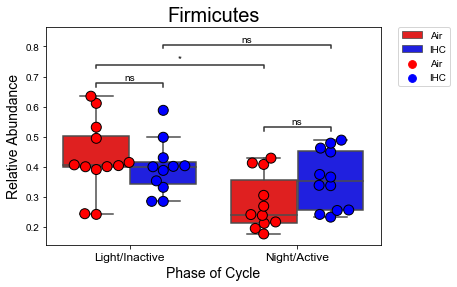

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

night_Air v.s. night_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=1.166e-01 U_stat=4.000e+01
day_Air v.s. day_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=5.105e-03 U_stat=2.000e+01
day_Air v.s. night_Air: Mann-Whitney-Wilcoxon test two-sided P_val=2.815e-01 U_stat=8.400e+01
day_IHC v.s. night_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=5.105e-03 U_stat=1.120e+02


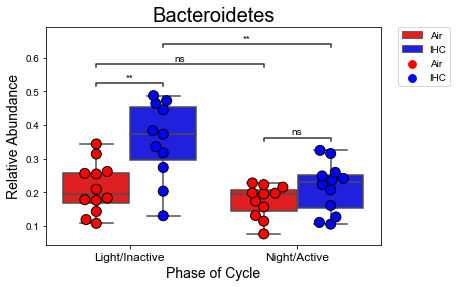

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

night_Air v.s. night_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=1.064e-02 U_stat=1.080e+02
day_Air v.s. day_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=2.890e-02 U_stat=1.020e+02
day_Air v.s. night_Air: Mann-Whitney-Wilcoxon test two-sided P_val=5.064e-04 U_stat=9.000e+00
day_IHC v.s. night_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=9.923e-04 U_stat=1.200e+01


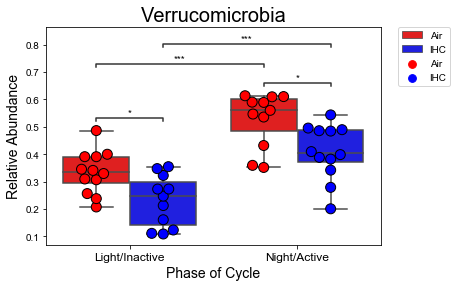

In [21]:
box_pairs=[(("day", "Air"), ("day", "IHC")),
           (("day", "Air"), ("night", "Air")), 
           (("night", "Air"), ("night", "IHC")), 
          (("night", "IHC"), ("day", "IHC"))]
for phyla in phyla_top_3:
    g = sns.boxplot(x="cycle", y=phyla, hue="exposure_type", 
                    palette=['red', 'blue'], data=phyla_merged)
    g = sns.swarmplot(x="cycle", y=phyla, dodge=True, s=10, linewidth=1, edgecolor='k', 
                hue="exposure_type", palette=['red', 'blue'], data=phyla_merged)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title(phyla.split("_")[-1], fontsize=20)
    plt.ylabel('Relative Abundance', fontsize=14)
    plt.xlabel('Phase of Cycle', fontsize=14)
    plt.xticks(np.arange(2), ('Light/Inactive', 'Night/Active'), fontsize=12)
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = 'Arial'
    plt.rcParams['svg.fonttype'] = 'none'
    add_stat_annotation(g, data=phyla_merged, x="cycle", y=phyla, hue="exposure_type",
                    box_pairs=box_pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)
    plt.savefig('../figures/cIHC_phyla_box_%s.svg' % phyla.split("_")[-1], dpi=300, bbox_inches = "tight")
    plt.show()

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

2_Air v.s. 2_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=3.038e-02 U_stat=1.600e+01
1_Air v.s. 1_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=3.768e-01 U_stat=9.000e+00
3_Air v.s. 3_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=6.650e-01 U_stat=1.000e+01
6_Air v.s. 6_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=3.038e-02 U_stat=1.600e+01
4_Air v.s. 4_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=5.959e-01 U_stat=8.000e+00
5_Air v.s. 5_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=3.038e-02 U_stat=1.600e+01


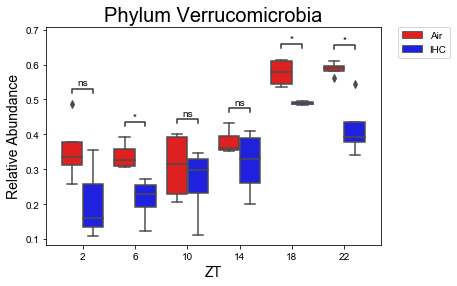

In [22]:
single_phyla_merged = phyla_merged[phyla_merged['timepoint'] < 7]
box_pairs=[((tp, "Air"), (tp, "IHC")) for tp in single_phyla_merged['timepoint'].unique()]

g = sns.boxplot(x="timepoint", y='k__Bacteria;p__Verrucomicrobia', hue="exposure_type", 
                    palette=['red', 'blue'], data=single_phyla_merged)
#g = sns.swarmplot(x="cycle", y=family, dodge=True, s=10, linewidth=1, edgecolor='k', 
#                hue="exposure_type", palette=['red', 'blue'], data=family_merged)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Phylum Verrucomicrobia', fontsize=20)
plt.ylabel('Relative Abundance', fontsize=14)
plt.xlabel('ZT', fontsize=14)
plt.xticks(np.arange(12), ('2', '6', '10', '14', '18', '22'))
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
add_stat_annotation(g, data=single_phyla_merged, x="timepoint", y='k__Bacteria;p__Verrucomicrobia', hue="exposure_type",
                    box_pairs=box_pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)
#plt.savefig('../figures/cIHC_family_box_%s.svg' % family.split("_")[-1], dpi=300, bbox_inches = "tight")
plt.show()

# Family Level

## Double plots

In [23]:
family = pd.read_table("../data/Microbiome/core_diversity_12000/rarefied_family_relfreq_table.txt", sep='\t', index_col=0)
family_sp = family.T
family_sp.head()

#OTU ID,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Cenarchaeales;f__Cenarchaeaceae,k__Bacteria;__;__;__;__,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;__,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Actinomycetaceae,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Propionibacteriaceae,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Bifidobacteriales;f__Bifidobacteriaceae,k__Bacteria;p__Actinobacteria;c__Coriobacteriia;o__Coriobacteriales;f__Coriobacteriaceae,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;__,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Porphyromonadaceae,...,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacteriales;f__Enterobacteriaceae,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Moraxellaceae,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Pseudomonadaceae,k__Bacteria;p__Tenericutes;c__Mollicutes;__;__,k__Bacteria;p__Tenericutes;c__Mollicutes;o__Anaeroplasmatales;f__Anaeroplasmataceae,k__Bacteria;p__Tenericutes;c__Mollicutes;o__RF39;f__,k__Bacteria;p__Verrucomicrobia;c__Opitutae;o__Puniceicoccales;f__Puniceicoccaceae,k__Bacteria;p__Verrucomicrobia;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Verrucomicrobiaceae,k__Bacteria;p__[Thermi];c__Deinococci;o__Deinococcales;f__Deinococcaceae,k__Bacteria;p__[Thermi];c__Deinococci;o__Thermales;f__Thermaceae
11548.A25.126.5a,0.000000,0.020250,0.0,0.0,0.0,0.000000,0.000500,0.0,0.000167,0.00000,...,0.0,0.0,0.000000,0.0,0.000000,0.000583,0.0,0.486083,0.0,0.0
11548.132.133.5a,0.000667,0.012833,0.0,0.0,0.0,0.001083,0.001417,0.0,0.000500,0.00025,...,0.0,0.0,0.000417,0.0,0.000417,0.000000,0.0,0.613667,0.0,0.0
11548.A31.132.3a,0.000000,0.010167,0.0,0.0,0.0,0.000000,0.001667,0.0,0.000083,0.00000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.400083,0.0,0.0
11548.A29.130.5a,0.000000,0.012833,0.0,0.0,0.0,0.003583,0.000750,0.0,0.000083,0.00000,...,0.0,0.0,0.000000,0.0,0.000583,0.001583,0.0,0.536000,0.0,0.0
11548.A26.127.1a,0.000000,0.010667,0.0,0.0,0.0,0.000583,0.000667,0.0,0.000000,0.00000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.354750,0.0,0.0


In [24]:
family_merged = pd.merge(family_sp, metadata, left_index=True, right_index=True)
family_merged.head()

,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Cenarchaeales;f__Cenarchaeaceae,k__Bacteria;__;__;__;__,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;__,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Actinomycetaceae,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Propionibacteriaceae,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Bifidobacteriales;f__Bifidobacteriaceae,k__Bacteria;p__Actinobacteria;c__Coriobacteriia;o__Coriobacteriales;f__Coriobacteriaceae,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;__,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Porphyromonadaceae,...,physical_specimen_location,physical_specimen_remaining,qiita_study_id,sample_name_orit,sample_type,scientific_name,sex,taxon_id,title,treatment
11548.A25.126.5a,0.000000,0.020250,0.0,0.0,0.0,0.000000,0.000500,0.0,0.000167,0.00000,...,UCSDMI,True,11548,not applicable,feces,mouse gut metagenome,male,410661,IHC CR,In chamber
11548.132.133.5a,0.000667,0.012833,0.0,0.0,0.0,0.001083,0.001417,0.0,0.000500,0.00025,...,LBR freezer,True,11548,not applicable,feces,mouse gut metagenome,male,410661,IHC CR,On shelf
11548.A31.132.3a,0.000000,0.010167,0.0,0.0,0.0,0.000000,0.001667,0.0,0.000083,0.00000,...,UCSDMI,True,11548,not applicable,feces,mouse gut metagenome,male,410661,IHC CR,On shelf
11548.A29.130.5a,0.000000,0.012833,0.0,0.0,0.0,0.003583,0.000750,0.0,0.000083,0.00000,...,UCSDMI,True,11548,not applicable,feces,mouse gut metagenome,male,410661,IHC CR,On shelf
11548.A26.127.1a,0.000000,0.010667,0.0,0.0,0.0,0.000583,0.000667,0.0,0.000000,0.00000,...,UCSDMI,True,11548,not applicable,feces,mouse gut metagenome,male,410661,IHC CR,In chamber


In [25]:
family_merged["both"] = family_merged["exposure_type"].astype(str) + "_" + family_merged["timepoint"].astype(str)

In [26]:
fn = lambda row: row.timepoint + 6 # define a function for the new column
col = family_merged.apply(fn, axis=1) # get column data with an index
family_merged = family_merged.assign(new_tp=col.values) # assign values to column 'new'
family_merged.head()

,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Cenarchaeales;f__Cenarchaeaceae,k__Bacteria;__;__;__;__,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;__,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Actinomycetaceae,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Propionibacteriaceae,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Bifidobacteriales;f__Bifidobacteriaceae,k__Bacteria;p__Actinobacteria;c__Coriobacteriia;o__Coriobacteriales;f__Coriobacteriaceae,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;__,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Porphyromonadaceae,...,qiita_study_id,sample_name_orit,sample_type,scientific_name,sex,taxon_id,title,treatment,both,new_tp
11548.A25.126.5a,0.000000,0.020250,0.0,0.0,0.0,0.000000,0.000500,0.0,0.000167,0.00000,...,11548,not applicable,feces,mouse gut metagenome,male,410661,IHC CR,In chamber,IHC_5,11
11548.132.133.5a,0.000667,0.012833,0.0,0.0,0.0,0.001083,0.001417,0.0,0.000500,0.00025,...,11548,not applicable,feces,mouse gut metagenome,male,410661,IHC CR,On shelf,Air_5,11
11548.A31.132.3a,0.000000,0.010167,0.0,0.0,0.0,0.000000,0.001667,0.0,0.000083,0.00000,...,11548,not applicable,feces,mouse gut metagenome,male,410661,IHC CR,On shelf,Air_3,9
11548.A29.130.5a,0.000000,0.012833,0.0,0.0,0.0,0.003583,0.000750,0.0,0.000083,0.00000,...,11548,not applicable,feces,mouse gut metagenome,male,410661,IHC CR,On shelf,Air_5,11
11548.A26.127.1a,0.000000,0.010667,0.0,0.0,0.0,0.000583,0.000667,0.0,0.000000,0.00000,...,11548,not applicable,feces,mouse gut metagenome,male,410661,IHC CR,In chamber,IHC_1,7


In [27]:
family_merged["new_both"] = family_merged["exposure_type"].astype(str) + "_" + family_merged["new_tp"].astype(str)

In [28]:
#family_merged.to_csv("../data/Microbiome/core_diversity_12000/rarefied_family_rf_double.txt", sep='\t')

In [29]:
#manually copied data and named condition_timepoint(7-12)

In [30]:
family_dp = pd.read_csv("../data/Microbiome/core_diversity_12000/rarefied_family_rf_double.txt", sep='\t', index_col=0)
family_dp.head()

,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Cenarchaeales;f__Cenarchaeaceae,k__Bacteria;__;__;__;__,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;__,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Actinomycetaceae,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Propionibacteriaceae,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Bifidobacteriales;f__Bifidobacteriaceae,k__Bacteria;p__Actinobacteria;c__Coriobacteriia;o__Coriobacteriales;f__Coriobacteriaceae,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;__,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Porphyromonadaceae,...,physical_specimen_remaining,qiita_study_id,sample_name_orit,sample_type,scientific_name,sex,taxon_id,title,treatment,both
11548.A25.126.5a,0.000000,0.020250,0.0,0.0,0.0,0.000000,0.000500,0.0,0.000167,0.00000,...,True,11548,not applicable,feces,mouse gut metagenome,male,410661,IHC CR,In chamber,IHC_5
11548.132.133.5a,0.000667,0.012833,0.0,0.0,0.0,0.001083,0.001417,0.0,0.000500,0.00025,...,True,11548,not applicable,feces,mouse gut metagenome,male,410661,IHC CR,On shelf,Air_5
11548.A31.132.3a,0.000000,0.010167,0.0,0.0,0.0,0.000000,0.001667,0.0,0.000083,0.00000,...,True,11548,not applicable,feces,mouse gut metagenome,male,410661,IHC CR,On shelf,Air_3
11548.A29.130.5a,0.000000,0.012833,0.0,0.0,0.0,0.003583,0.000750,0.0,0.000083,0.00000,...,True,11548,not applicable,feces,mouse gut metagenome,male,410661,IHC CR,On shelf,Air_5
11548.A26.127.1a,0.000000,0.010667,0.0,0.0,0.0,0.000583,0.000667,0.0,0.000000,0.00000,...,True,11548,not applicable,feces,mouse gut metagenome,male,410661,IHC CR,In chamber,IHC_1


In [31]:
family_top = ['k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae', 
              'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae', 
              'k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__S24-7', 
             'k__Bacteria;p__Actinobacteria;c__Coriobacteriia;o__Coriobacteriales;f__Coriobacteriaceae', 
             'k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae']

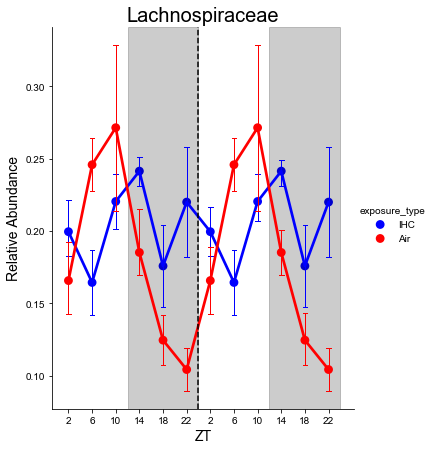

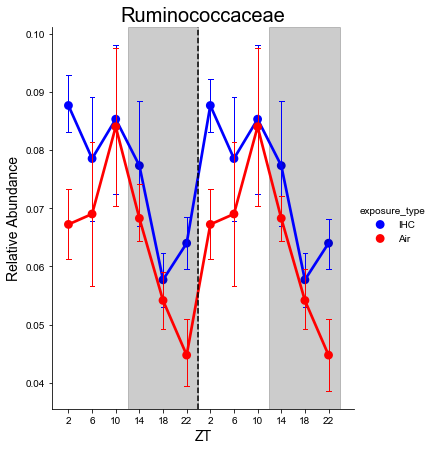

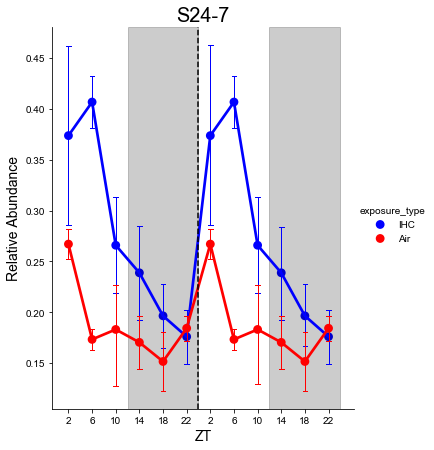

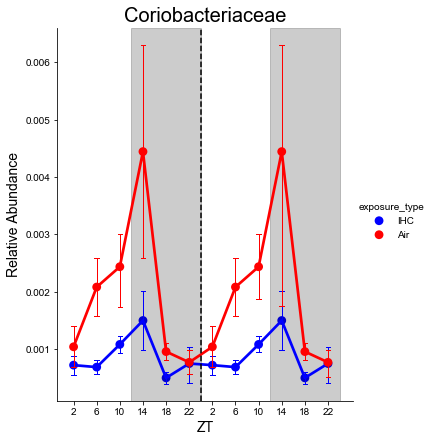

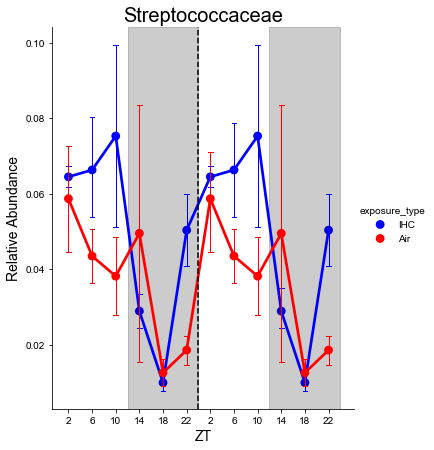

In [32]:
for family in family_top:
    g = sns.catplot(x="timepoint", y=family,
                hue="exposure_type", capsize=.2, palette=['blue', 'red'], ci=68,
                height=6, aspect=.85, kind="point", errwidth=1, data=family_dp)

    plt.axvspan(2.5, 5.5, alpha=0.2, color='black')
    plt.axvspan(8.5, 11.5, alpha=0.2, color='black')
    plt.axvline(x=5.5, color='k', linestyle='--')
    plt.title(family.split("_")[-1], fontsize=20)
    plt.ylabel('Relative Abundance', fontsize=14)
    plt.xlabel('ZT', fontsize=14)
    plt.xticks(np.arange(12), ('2', '6', '10', '14', '18', '22', '2', '6', '10', '14', '18', '22'))
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = 'Arial'
    plt.rcParams['svg.fonttype'] = 'none'
    plt.savefig('../figures/cIHC_family_double_%s.svg' % family.split("_")[-1], dpi=300, bbox_inches = "tight")
    plt.show()

## Boxplots

In [33]:
family_merged.sort_values('cycle', inplace=True)

In [34]:
family_merged.sort_values('exposure_type', ascending=True, inplace=True)

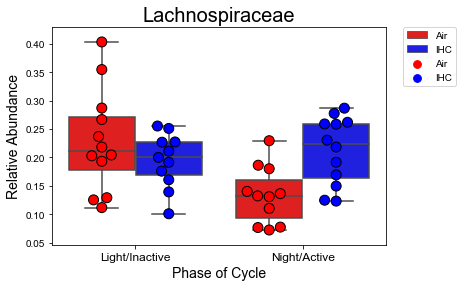

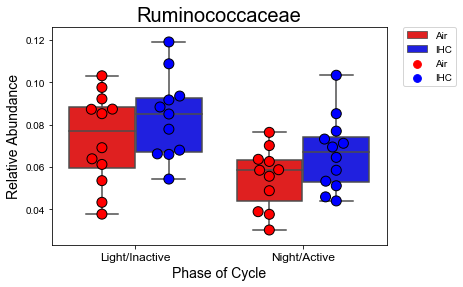

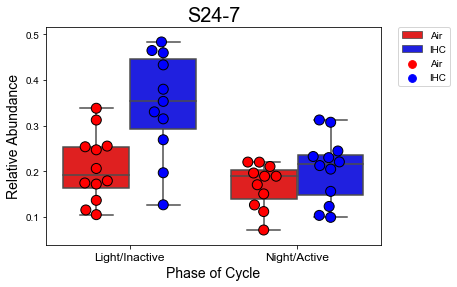

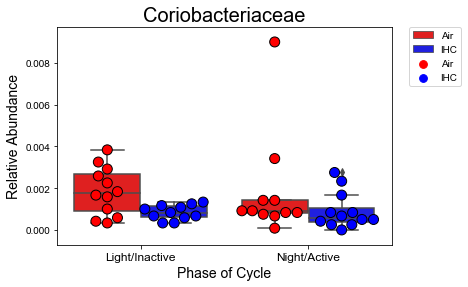

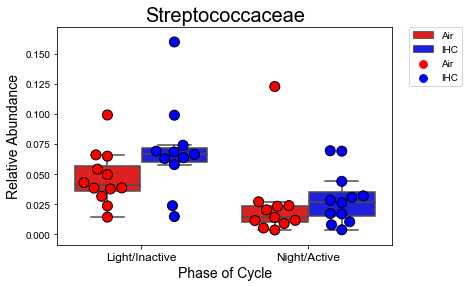

In [35]:
for family in family_top:
    g = sns.boxplot(x="cycle", y=family, hue="exposure_type", 
                    palette=['red', 'blue'], data=family_merged)
    g = sns.swarmplot(x="cycle", y=family, dodge=True, s=10, linewidth=1, edgecolor='k', 
                hue="exposure_type", palette=['red', 'blue'], data=family_merged)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title(family.split("_")[-1], fontsize=20)
    plt.ylabel('Relative Abundance', fontsize=14)
    plt.xlabel('Phase of Cycle', fontsize=14)
    plt.xticks(np.arange(2), ('Light/Inactive', 'Night/Active'), fontsize=12)
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = 'Arial'
    plt.rcParams['svg.fonttype'] = 'none'
    #plt.savefig('../figures/cIHC_family_box_%s.svg' % family.split("_")[-1], dpi=300, bbox_inches = "tight")
    plt.show()

In [36]:
FM = family_merged[['k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae', 'exposure_type', 'cycle','zt']].copy()
EP = FM[FM["exposure_type"] == 'Air']
r = EP[EP["cycle"] == 'day']
s = EP[EP["cycle"] == 'day']
x1 = r['k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae'].values
x1

array([0.23675   , 0.11158333, 0.12516667, 0.21816667, 0.129     ,
       0.28683333, 0.20425   , 0.26658333, 0.19316667, 0.20283333,
       0.40316667, 0.35458333])

In [37]:
for family in family_top:
    FM = family_merged[[family, 'exposure_type', 'cycle']].copy()
    print(family)
    for cyc in family_merged.cycle.unique():
        TP = FM[FM["cycle"] == cyc]
        p = TP[TP['exposure_type'] == 'Air']
        q = TP[TP['exposure_type'] == 'IHC']
        x1 = p[family].values
        y1 = q[family].values
        w1, z1 = mannwhitneyu(x1, y1)
        print("phase", cyc)
        print("p-value", z1)
    for exp in family_merged.exposure_type.unique():
        EP = FM[FM["exposure_type"] == exp]
        r = EP[EP['cycle'] == 'day']
        s = EP[EP['cycle'] == 'night']
        x2 = r[family].values
        y2 = s[family].values
        w2, z2 = mannwhitneyu(x2, y2)
        print("exposure type", exp)
        print("p-value", z2)
    print("___________________________")

k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae
phase day
p-value 0.20302422455236335
phase night
p-value 0.003711572833745912
exposure type Air
p-value 0.0063405327227377805
exposure type IHC
p-value 0.15493262968089666
___________________________
k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae
phase day
p-value 0.1700521842807901
phase night
p-value 0.06977579501947356
exposure type Air
p-value 0.01961422519376942
exposure type IHC
p-value 0.02273735377761187
___________________________
k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__S24-7
phase day
p-value 0.002552508210074876
phase night
p-value 0.0657461216336926
exposure type Air
p-value 0.1406693987907826
exposure type IHC
p-value 0.0021057004498979542
___________________________
k__Bacteria;p__Actinobacteria;c__Coriobacteriia;o__Coriobacteriales;f__Coriobacteriaceae
phase day
p-value 0.019444613026315616
phase night
p-value 0.06909010074078065
exposure type

In [38]:
from scipy.stats import wilcoxon

In [39]:
for family in family_top:
    FM = family_merged[[family, 'exposure_type', 'cycle']].copy()
    print(family)
    for cyc in family_merged.cycle.unique():
        TP = FM[FM["cycle"] == cyc]
        p = TP[TP['exposure_type'] == 'Air']
        q = TP[TP['exposure_type'] == 'IHC']
        x1 = p[family].values
        y1 = q[family].values
        if len(x1) == len(y1):
            w1, z1 = wilcoxon(x1, y1)
            print("phase", cyc)
            print("p-value", z1)
        else: 
            print("phase", cyc)
            print("not even")
    for exp in family_merged.exposure_type.unique():
        EP = FM[FM["exposure_type"] == exp]
        r = EP[EP['cycle'] == 'day']
        s = EP[EP['cycle'] == 'night']
        x2 = r[family].values
        y2 = s[family].values
        if len(x2) == len(y2):
            w2, z2 = wilcoxon(x2, y2)
            print("exposure type", exp)
            print("p-value", z2)
        else: 
            print("exposure type", exp)
            print("not even")
    print("___________________________")

k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae
phase day
not even
phase night
not even
exposure type Air
not even
exposure type IHC
not even
___________________________
k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae
phase day
not even
phase night
not even
exposure type Air
not even
exposure type IHC
not even
___________________________
k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__S24-7
phase day
not even
phase night
not even
exposure type Air
not even
exposure type IHC
not even
___________________________
k__Bacteria;p__Actinobacteria;c__Coriobacteriia;o__Coriobacteriales;f__Coriobacteriaceae
phase day
not even
phase night
not even
exposure type Air
not even
exposure type IHC
not even
___________________________
k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae
phase day
not even
phase night
not even
exposure type Air
not even
exposure type IHC
not even
___________________________


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

night_Air v.s. night_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=7.423e-03 U_stat=2.200e+01
day_Air v.s. day_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=4.060e-01 U_stat=8.000e+01
day_Air v.s. night_Air: Mann-Whitney-Wilcoxon test two-sided P_val=1.268e-02 U_stat=1.070e+02
day_IHC v.s. night_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=3.099e-01 U_stat=4.900e+01


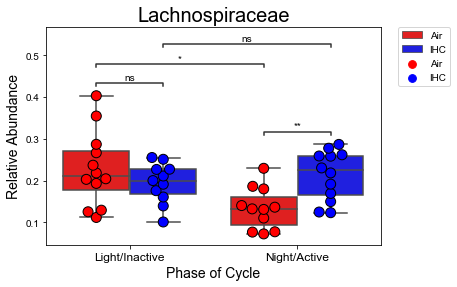

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

night_Air v.s. night_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=1.396e-01 U_stat=4.150e+01
day_Air v.s. day_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=3.401e-01 U_stat=5.000e+01
day_Air v.s. night_Air: Mann-Whitney-Wilcoxon test two-sided P_val=3.923e-02 U_stat=1.000e+02
day_IHC v.s. night_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=4.547e-02 U_stat=9.900e+01


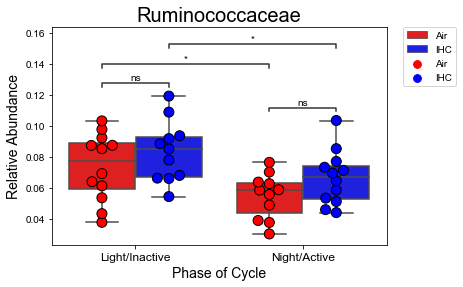

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

night_Air v.s. night_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=1.315e-01 U_stat=4.100e+01
day_Air v.s. day_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=5.105e-03 U_stat=2.000e+01
day_Air v.s. night_Air: Mann-Whitney-Wilcoxon test two-sided P_val=2.813e-01 U_stat=8.400e+01
day_IHC v.s. night_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=4.211e-03 U_stat=1.130e+02


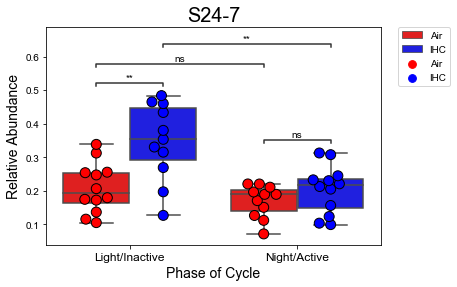

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

night_Air v.s. night_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=1.382e-01 U_stat=9.050e+01
day_Air v.s. day_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=3.889e-02 U_stat=1.000e+02
day_Air v.s. night_Air: Mann-Whitney-Wilcoxon test two-sided P_val=3.095e-01 U_stat=8.300e+01
day_IHC v.s. night_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=4.779e-01 U_stat=7.800e+01


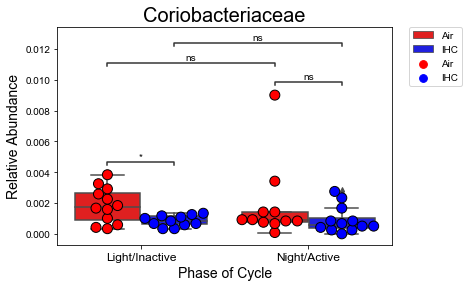

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

night_Air v.s. night_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=2.071e-01 U_stat=4.500e+01
day_Air v.s. day_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=6.050e-02 U_stat=3.500e+01
day_Air v.s. night_Air: Mann-Whitney-Wilcoxon test two-sided P_val=3.462e-03 U_stat=1.140e+02
day_IHC v.s. night_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=1.932e-02 U_stat=1.045e+02


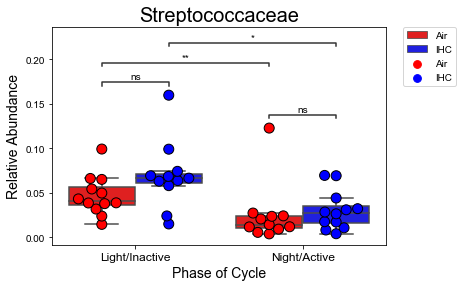

In [40]:
box_pairs=[(("day", "Air"), ("day", "IHC")),
           (("day", "Air"), ("night", "Air")), 
           (("night", "Air"), ("night", "IHC")), 
          (("night", "IHC"), ("day", "IHC"))]
for family in family_top:
    g = sns.boxplot(x="cycle", y=family, hue="exposure_type", 
                    palette=['red', 'blue'], data=family_merged)
    g = sns.swarmplot(x="cycle", y=family, dodge=True, s=10, linewidth=1, edgecolor='k', 
                hue="exposure_type", palette=['red', 'blue'], data=family_merged)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title(family.split("_")[-1], fontsize=20)
    plt.ylabel('Relative Abundance', fontsize=14)
    plt.xlabel('Phase of Cycle', fontsize=14)
    plt.xticks(np.arange(2), ('Light/Inactive', 'Night/Active'), fontsize=12)
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = 'Arial'
    plt.rcParams['svg.fonttype'] = 'none'
    add_stat_annotation(g, data=family_merged, x="cycle", y=family, hue="exposure_type",
                    box_pairs=box_pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)
    plt.savefig('../figures/cIHC_family_box_%s.svg' % family.split("_")[-1], dpi=300, bbox_inches = "tight")
    plt.show()

In [41]:
for family in family_top:
    FM = family_merged[[family, 'exposure_type', 'cycle']].copy()
    print(family)
    for cond in [("Air", "IHC")]:
        A = FM[FM["exposure_type"] == cond[0]]
        I = FM[FM["exposure_type"] == cond[1]]
        CondA = A[family].sum()
        CondI = I[family].sum()
        print(cond[0], CondA)
        print(cond[1], CondI)
        
        if CondA > CondI:
            print("Highest is Air")
        else: 
            print("Highest is IHC")
    print("___________________________")

k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae
Air 4.202916667
IHC 4.687250002
Highest is IHC
___________________________
k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae
Air 1.481666665
IHC 1.7145833349999997
Highest is IHC
___________________________
k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__S24-7
Air 4.3477499989999995
IHC 6.256166669000001
Highest is IHC
___________________________
k__Bacteria;p__Actinobacteria;c__Coriobacteriia;o__Coriobacteriales;f__Coriobacteriaceae
Air 0.04249996700000001
IHC 0.020249998999999998
Highest is Air
___________________________
k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae
Air 0.8337500010000001
IHC 1.115833332
Highest is IHC
___________________________


In [45]:
for family in family_top:
    FM = family_merged[[family, 'exposure_type', 'mouse_number', 'cycle']].copy()
    print(family)
    for cond in [("Air", "IHC")]:
        A = FM[FM["exposure_type"] == cond[0]]
        I = FM[FM["exposure_type"] == cond[1]]
        
        sums1 = []
        sums2 = []

        for mus1 in A.mouse_number.unique():
            MurineA = A[A['mouse_number'] == mus1]
            sums1.append(MurineA[family].sum())
            
        for mus2 in I.mouse_number.unique():
            MurineI = I[I['mouse_number'] == mus2]
            sums2.append(MurineI[family].sum())
        
    ww, zz = mannwhitneyu(sums1, sums2)
    print("p-value", zz)
        
    print("___________________________")

k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae
p-value 0.156160710838108
___________________________
k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae
p-value 0.156160710838108
___________________________
k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__S24-7
p-value 0.056175598845231926
___________________________
k__Bacteria;p__Actinobacteria;c__Coriobacteriia;o__Coriobacteriales;f__Coriobacteriaceae
p-value 0.056175598845231926
___________________________
k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae
p-value 0.156160710838108
___________________________
